In [1]:
# Import the dependencies. 6.1.4
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list. This is unpacking a zip object into a list. sec 6.1.4
coordinates = list(lat_lngs)

In [4]:
# import the citypy module
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

567

In [6]:
# Import the requests library. 6.2.6
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8094f7fd4cf83856e02dd9562b63d4de


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | baker city
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | ketchikan
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | nguiu
City not found. Skipping...
Processing Record 13 of Set 1 | kefamenanu
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | rabo de peixe
Processing Record 16 of Set 1 | erzin
Processing Record 17 of Set 1 | den helder
Processing Record 18 of Set 1 | kaitangata
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | tu

Processing Record 35 of Set 4 | aykhal
Processing Record 36 of Set 4 | waddan
Processing Record 37 of Set 4 | vila velha
Processing Record 38 of Set 4 | pombas
Processing Record 39 of Set 4 | jeremie
Processing Record 40 of Set 4 | jaisalmer
Processing Record 41 of Set 4 | mahebourg
Processing Record 42 of Set 4 | lavrentiya
Processing Record 43 of Set 4 | senneterre
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | sao miguel do araguaia
Processing Record 46 of Set 4 | jinji
Processing Record 47 of Set 4 | sitka
Processing Record 48 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 50 of Set 4 | bambous virieux
Processing Record 1 of Set 5 | tasbuget
City not found. Skipping...
Processing Record 2 of Set 5 | kangaatsiaq
Processing Record 3 of Set 5 | amderma
City not found. Skipping...
Processing Record 4 of Set 5 | flinders
Processing Record 5 of Set 5 | samarai
Processing R

Processing Record 25 of Set 8 | karratha
Processing Record 26 of Set 8 | guamuchil
Processing Record 27 of Set 8 | quelimane
Processing Record 28 of Set 8 | kaura namoda
Processing Record 29 of Set 8 | parana
Processing Record 30 of Set 8 | susanville
Processing Record 31 of Set 8 | verkhnevilyuysk
Processing Record 32 of Set 8 | bundaberg
Processing Record 33 of Set 8 | hede
Processing Record 34 of Set 8 | san rafael
Processing Record 35 of Set 8 | baijiantan
Processing Record 36 of Set 8 | kiruna
Processing Record 37 of Set 8 | svetlyy
Processing Record 38 of Set 8 | cap malheureux
Processing Record 39 of Set 8 | kysyl-syr
Processing Record 40 of Set 8 | shush
Processing Record 41 of Set 8 | hovd
Processing Record 42 of Set 8 | tecoanapa
Processing Record 43 of Set 8 | coihaique
Processing Record 44 of Set 8 | sabha
Processing Record 45 of Set 8 | corlu
Processing Record 46 of Set 8 | minna
Processing Record 47 of Set 8 | zhenhai
Processing Record 48 of Set 8 | tortoli
Processing Rec

Processing Record 12 of Set 12 | aswan
Processing Record 13 of Set 12 | cabedelo
Processing Record 14 of Set 12 | zgierz
Processing Record 15 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 16 of Set 12 | bowen
Processing Record 17 of Set 12 | sabang
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# tally the number of cities in the city_data array of dictionaries using the len() function. 6.2.6
len(city_data)

519

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame. 6.2.7
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Barrow,71.2906,-156.7887,8.62,85,100,6.91,US,2022-04-24 12:49:06
1,Arraial Do Cabo,-22.9661,-42.0278,80.46,74,40,10.36,BR,2022-04-24 12:49:06
2,Bluff,-46.6000,168.3333,51.80,85,100,21.59,NZ,2022-04-24 12:49:07
3,Baker City,44.7749,-117.8344,24.51,93,0,0.00,US,2022-04-24 12:49:07
4,Mar Del Plata,-38.0023,-57.5575,57.87,83,0,13.80,AR,2022-04-24 12:49:08
5,Busselton,-33.6500,115.3333,63.50,58,100,8.81,AU,2022-04-24 12:49:08
6,New Norfolk,-42.7826,147.0587,55.92,77,37,0.51,AU,2022-04-24 12:49:09
7,Ketchikan,55.3422,-131.6461,44.58,96,100,6.62,US,2022-04-24 12:49:09
8,Klaksvik,62.2266,-6.5890,47.32,87,100,18.34,FO,2022-04-24 12:49:10
9,Kefamenanu,-9.4467,124.4781,68.97,84,6,3.09,ID,2022-04-24 12:49:10


In [17]:
# reorder the columns above (City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed,)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [19]:
#assigning new order to dataframe. 6.2.7
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Barrow,US,2022-04-24 12:49:06,71.2906,-156.7887,8.62,85,100,6.91
1,Arraial Do Cabo,BR,2022-04-24 12:49:06,-22.9661,-42.0278,80.46,74,40,10.36
2,Bluff,NZ,2022-04-24 12:49:07,-46.6000,168.3333,51.80,85,100,21.59
3,Baker City,US,2022-04-24 12:49:07,44.7749,-117.8344,24.51,93,0,0.00
4,Mar Del Plata,AR,2022-04-24 12:49:08,-38.0023,-57.5575,57.87,83,0,13.80
...,...,...,...,...,...,...,...,...,...
514,Aswan,EG,2022-04-24 13:07:43,24.0934,32.9070,98.24,6,100,8.48
515,Cabedelo,BR,2022-04-24 13:07:44,-6.9811,-34.8339,79.47,77,93,14.92
516,Zgierz,PL,2022-04-24 13:07:44,51.8556,19.4062,64.18,51,40,11.50
517,Bowen,AU,2022-04-24 13:07:45,-20.0167,148.2333,76.64,81,100,25.26


In [20]:
# Create the output file (CSV). 6.2.7
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [23]:
# Extract relevant fields from the DataFrame for plotting. 6.3.1
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

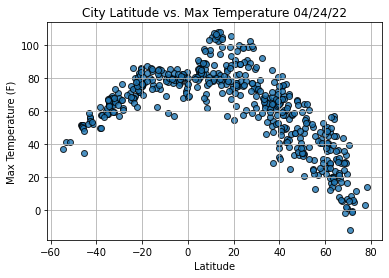

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

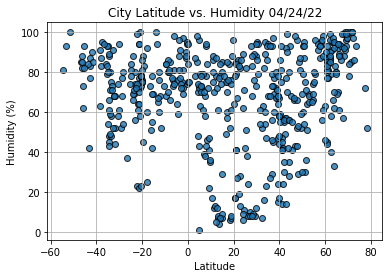

In [25]:
# Build the scatter plots for latitude vs. humidity. 6.3.2
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

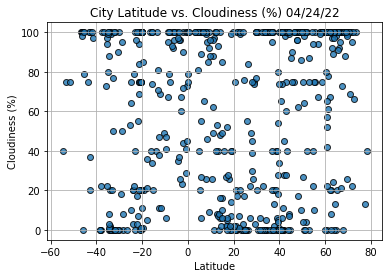

In [26]:
# Build the scatter plots for latitude vs. cloudiness.6.3.3
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


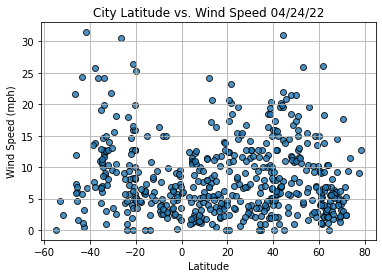

In [27]:
# Build the scatter plots for latitude vs. wind speed. 6.3.4
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()